In [2]:
import pandas as pd

data = pd.read_csv('C:/Users/LENOVO/Desktop/DataMining/life_expectancy.csv')



In [3]:
display(data.columns)

Index(['Country', 'Sum of Females  Life Expectancy',
       'Sum of Life Expectancy  (both sexes)',
       'Sum of Males  Life Expectancy'],
      dtype='object')

In [4]:
display(data.dtypes)

Country                                  object
Sum of Females  Life Expectancy         float64
Sum of Life Expectancy  (both sexes)    float64
Sum of Males  Life Expectancy           float64
dtype: object

In [5]:
display(data.head())

,Country,Sum of Females Life Expectancy,Sum of Life Expectancy (both sexes),Sum of Males Life Expectancy
0,Chad,57.19,55.24,53.36
1,Nigeria,54.94,54.64,54.33
2,South Sudan,60.75,57.74,54.76
3,Lesotho,60.44,57.80,55.03
4,Central African Republic,59.56,57.67,55.51


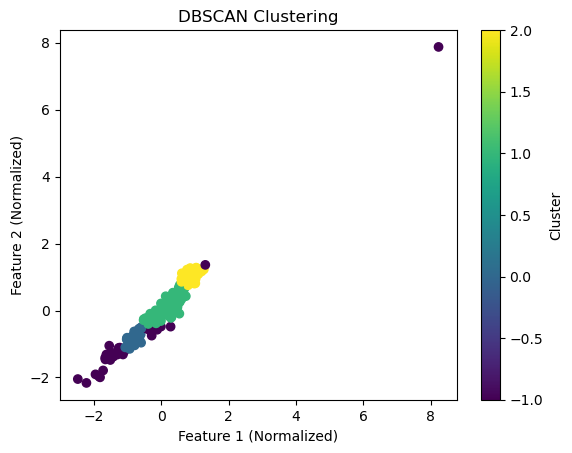

Nombre de clusters trouvés  : 3
Nombre de points considérés comme outliers : 36


In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Normaliser les colonnes numériques
features = ['Sum of Females  Life Expectancy', 'Sum of Males  Life Expectancy']
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data[features])

# Appliquer DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=12)  
labels = dbscan.fit_predict(normalized_data)

# Ajouter les étiquettes au DataFrame
data['Cluster'] = labels

# Visualiser les clusters (par exemple, en utilisant deux dimensions)
plt.scatter(normalized_data[:, 0], normalized_data[:, 1], c=labels, cmap='viridis')
plt.xlabel('Feature 1 (Normalized)')
plt.ylabel('Feature 2 (Normalized)')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster')
plt.show()


print(f"Nombre de clusters trouvés  : {len(set(labels)) - (1 if -1 in labels else 0)}")
print(f"Nombre de points considérés comme outliers : {np.sum(labels == -1)}")

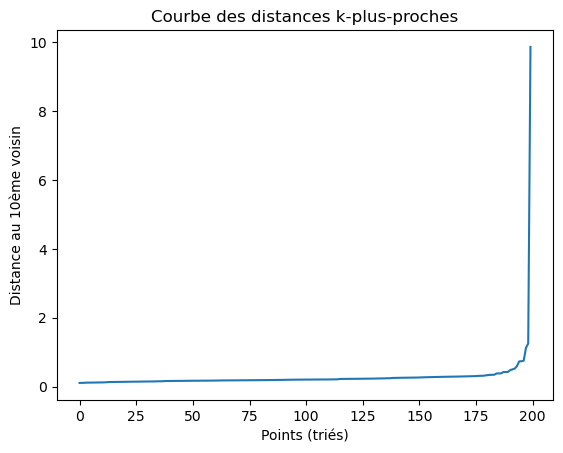

In [35]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Calculer les distances des k-plus-proches voisins
neighbors = NearestNeighbors(n_neighbors=13)  # k = min_samples
neighbors_fit = neighbors.fit(normalized_data)
distances, indices = neighbors_fit.kneighbors(normalized_data)

# Trier les distances et tracer la courbe
distances = np.sort(distances[:, -1])  # Dernière colonne = distance au k-ième voisin
plt.plot(distances)
plt.xlabel('Points (triés)')
plt.ylabel('Distance au 10ème voisin')
plt.title('Courbe des distances k-plus-proches')
plt.show()

In [53]:
from sklearn.metrics import silhouette_score

# Vérifier qu'il y a plus d'un cluster (inclure le bruit)
if len(set(labels)) > 1:  # Ne pas exclure le bruit (-1)
    score = silhouette_score(normalized_data, labels)
    print(f"Score de silhouette (avec bruit) : {score:.2f}")
else:
    print("Impossible de calculer le score de silhouette : moins de 2 clusters valides.")

Score de silhouette (avec bruit) : 0.38


In [50]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np

# Normaliser les colonnes numériques
features = ['Sum of Females  Life Expectancy', 'Sum of Males  Life Expectancy']
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data[features])

# Définir les plages de valeurs pour eps et min_samples
eps_values = np.arange(0.1, 1.0, 0.1)  # Par exemple, de 0.1 à 1.0 avec un pas de 0.1
min_samples_values = range(5, 20, 2)   # Par exemple, de 5 à 20 avec un pas de 2

best_score = -1
best_params = {'eps': None, 'min_samples': None}

# Recherche par grille
for eps in eps_values:
    for min_samples in min_samples_values:
        # Appliquer DBSCAN avec les paramètres actuels
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(normalized_data)
        
        # Vérifier qu'il y a plus d'un cluster valide
        if len(set(labels)) > 1:
            # Calculer le score de silhouette
            score = silhouette_score(normalized_data, labels)
            
            # Mettre à jour les meilleurs paramètres si le score est meilleur
            if score > best_score:
                best_score = score
                best_params['eps'] = eps
                best_params['min_samples'] = min_samples

# Afficher les meilleurs paramètres et le meilleur score
print(f"Meilleur score de silhouette : {best_score:.2f}")
print(f"Meilleures valeurs : eps = {best_params['eps']}, min_samples = {best_params['min_samples']}")

Meilleur score de silhouette : 0.88
Meilleures valeurs : eps = 0.5, min_samples = 5
